4. Mini-project

A

In [1]:
import torch as th
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt
import numpy as np

from model.DNN import DNN

In [2]:
train_ds = torchvision.datasets.FashionMNIST(
    root = "data", download=False, train=True, transform=torchvision.transforms.ToTensor()
    )
test_ds = torchvision.datasets.FashionMNIST(
    root = "data", download=False, train=False, transform=torchvision.transforms.ToTensor()
    )

In [3]:
print(train_ds)

batch_size = 10

train_dataloader = DataLoader(train_ds, batch_size=batch_size)
test_dataloader = DataLoader(test_ds, batch_size=batch_size)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [4]:
print(len(train_dataloader))
it = iter(train_dataloader)

6000


<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor(9)
types: 10
b: 10, c: 1, h: 28, w: 28


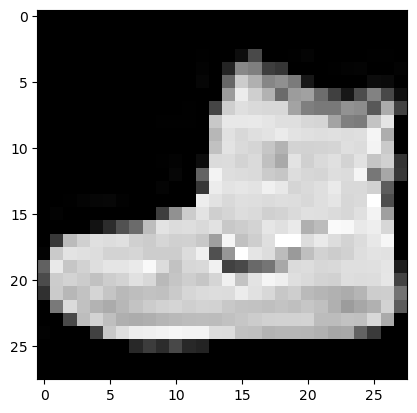

In [5]:
X, y = next(it)
print(type(X), type(y))
plt.imshow(torchvision.transforms.ToPILImage()(X[0].squeeze()), cmap="gray")
print(y[0])

types = len(set([i.item() for _, y in train_dataloader for i in y]))
print(f"types: {types}")

b, c, h, w = X.size()
print(f"b: {b}, c: {c}, h: {h}, w: {w}")

In [6]:
model = DNN(c, h, w, types)

In [7]:
device = "cuda" if th.cuda.is_available() else "cpu"
optimizer = th.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
epochs = 10
loss_fn = th.nn.CrossEntropyLoss()

model.to(device)

DNN(
  (input): Flatten(start_dim=1, end_dim=-1)
  (hidden): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
)

In [9]:
for epoch in range(epochs):
    print(f"epoch: {epoch}")
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        
        pred = model(X)
        loss = loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (batch + 1) % 1000 == 0:
            print(f"loss:{loss.item():>7f} [{(batch + 1) * len(X)} / {len(train_dataloader) * batch_size}]")
        

epoch: 0
loss:0.859433 [10000 / 60000]
loss:0.446316 [20000 / 60000]
loss:0.349547 [30000 / 60000]
loss:1.058414 [40000 / 60000]
loss:0.659050 [50000 / 60000]
loss:0.237487 [60000 / 60000]
epoch: 1
loss:0.626840 [10000 / 60000]
loss:0.392047 [20000 / 60000]
loss:0.342995 [30000 / 60000]
loss:0.966062 [40000 / 60000]
loss:0.613795 [50000 / 60000]
loss:0.216081 [60000 / 60000]
epoch: 2
loss:0.505247 [10000 / 60000]
loss:0.362750 [20000 / 60000]
loss:0.320300 [30000 / 60000]
loss:0.851355 [40000 / 60000]
loss:0.564728 [50000 / 60000]
loss:0.188331 [60000 / 60000]
epoch: 3
loss:0.429592 [10000 / 60000]
loss:0.330601 [20000 / 60000]
loss:0.308366 [30000 / 60000]
loss:0.769360 [40000 / 60000]
loss:0.546871 [50000 / 60000]
loss:0.171855 [60000 / 60000]
epoch: 4
loss:0.384323 [10000 / 60000]
loss:0.280362 [20000 / 60000]
loss:0.277047 [30000 / 60000]
loss:0.737032 [40000 / 60000]
loss:0.524763 [50000 / 60000]
loss:0.160436 [60000 / 60000]
epoch: 5
loss:0.354370 [10000 / 60000]
loss:0.244322 [2

In [24]:
sum_test = 10.0

acc = 0
for X, y in test_dataloader:
    y_pred = model(X)
    print(y_pred)
    print(y)
    acc = (y_pred.argmax(1) == y).sum().item()
    break
        
print(acc / sum_test)

tensor([[-1.6720e+00, -4.3114e+00, -2.4351e+00, -4.0906e+00, -4.2194e+00,
          4.9444e+00, -2.8185e+00,  5.8182e+00,  2.2869e+00,  7.8969e+00],
        [ 4.6232e+00, -4.2634e+00,  1.5555e+01, -1.0690e+00,  9.1342e+00,
         -8.0150e+00,  8.3397e+00, -1.1474e+01,  3.2847e-01, -1.1315e+01],
        [ 5.7963e+00,  1.6662e+01,  1.7438e+00,  3.1484e+00,  2.7942e+00,
         -1.0289e+01, -3.2984e+00, -4.7927e+00, -3.8622e-01, -8.2670e+00],
        [ 1.8515e+00,  1.3928e+01,  8.6656e-01,  5.1582e+00,  1.9905e+00,
         -6.7813e+00, -3.4290e+00, -4.1225e+00, -2.8116e+00, -3.6236e+00],
        [ 4.6516e+00, -2.1566e+00,  3.7491e+00,  1.3590e+00,  3.1439e+00,
         -5.3848e+00,  6.3396e+00, -6.4044e+00,  1.0193e+00, -5.1581e+00],
        [ 6.1401e+00,  1.2825e+01,  2.1380e+00,  2.2516e+00,  2.7437e+00,
         -8.6987e+00, -3.5697e-01, -4.8456e+00, -1.2412e+00, -8.5582e+00],
        [ 2.2108e+00, -1.8442e+00,  4.6449e+00,  1.1751e+00,  8.6782e+00,
         -2.7299e+00,  4.5316e+0